Frank’s Supervisor, Dr. Brown, holds expertise in both mathematical statistics and medical science. He assigned Frank the task of estimating the average reimbursement amount for dental claims in 2021. Due to Healthy Life's extensive client base, calculating the population mean directly is impractical. To tackle this challenge, Frank utilized the Excel Random Number Generator function to obtain a random sample of 49 dental claims from Healthy Life's records. The data provided in the Major Data file section represents the insurance coverage amounts for these selected claims. Please help Frank to construct 90%, 95%, and 99% confidence intervals for the true average reimbursement. Make sure that t-distribution is applicable: build a histogram with the given bin values and check whether it is approximately symmetric and bell-shaped. Then, use Descriptive Statistics function from Data Analysis. Constructing confidence intervals, please round values to at least two decimal places.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

In [ ]:
# df = pd.read_excel('/Users/mymac/Documents/Data Science Bootcamp/Week 8 - Stats Hypothesis Testing etc/Essentials of Statistics and Math for Data Science - Project 1/Major Data File.xlsx')

In [16]:
df = pd.read_excel('/Users/mymac/Documents/Data Science Bootcamp/Week 8 - Stats Hypothesis Testing etc/Essentials of Statistics and Math for Data Science - Project 1/Major Data File.xlsx', skiprows=2)

In [18]:
df.head()

,Unnamed: 0,Dental Claim Number,Amount Covered
0,NaN,1,375.50
1,NaN,2,380.00
2,NaN,3,192.75
3,NaN,4,400.00
4,NaN,5,230.00


In [22]:
df.drop(columns=df.columns[0], inplace=True)

In [24]:
df.head()

,Dental Claim Number,Amount Covered
0,1,375.50
1,2,380.00
2,3,192.75
3,4,400.00
4,5,230.00


In [35]:
mean = df['Amount Covered'].mean()
print(f"Mean: {mean:.2f}")

Mean: 283.54


In [36]:
std = np.round(df['Amount Covered'].std(), 2)
print(f"Standard Deviation: {std:.2f}")

Standard Deviation: 128.83


In [31]:
# Number of samples
n = len(df)
n

49

In [32]:
# Degree of freedom = n-1
d_f = n - 1
d_f

48

In [47]:
# Confidence Interval
confidence_levels = [0.90, 0.95, 0.99]
confidence_interval = []

for confidence_level in confidence_levels:
    t_critical = t.ppf(confidence_level + (1 - confidence_level)/2, df=d_f)
    margin_of_error = t_critical * std / (n ** 0.5)
    # Calculate confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    lower_bound = round(lower_bound, 2)
    upper_bound = round(upper_bound, 2)
    
    confidence_interval.append((confidence_level, lower_bound, upper_bound))
    print(f"{confidence_level * 100}% Confidence Interval: {lower_bound}, {upper_bound}")

90.0% Confidence Interval: 252.67, 314.41
95.0% Confidence Interval: 246.54, 320.55
99.0% Confidence Interval: 234.18, 332.9


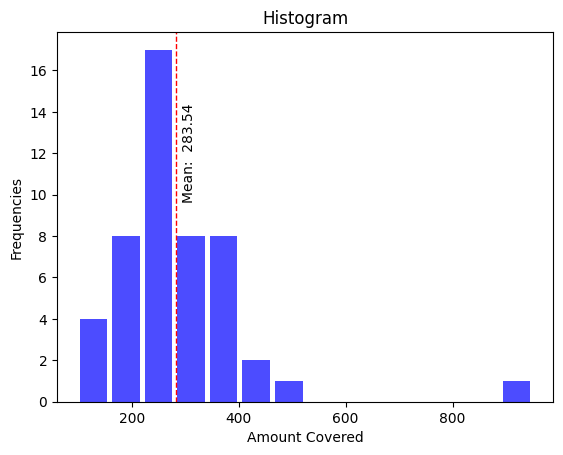

In [64]:
# build a histogram with the given bin values and check whether it is approximately symmetric and bell-shaped.
plt.hist(df['Amount Covered'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title("Histogram")
plt.xlabel('Amount Covered')
plt.ylabel('Frequencies')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.text(mean+10, 12, f'Mean: {mean: .2f}', rotation=90, verticalalignment='center')

plt.show()